## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre tether y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [20]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/tether/coin_id_tether.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_tether1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_tether1)

       id symbol    name  block_time_in_minutes hashing_algorithm  \
0  tether   usdt  Tether                      0              None   

                                         description                homepage  \
0  Tether (USDT) is a cryptocurrency with a value...  https://tether.to/, ,    

   reddit_subscribers  twitter_followers github_repos  \
0                   0             385521                

               last_updated  
0  2023-08-14T05:25:00.435Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [21]:
#Eliminar columnas
coin_id_tether1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [22]:
print(coin_id_tether1)

       id symbol    name  block_time_in_minutes hashing_algorithm  \
0  tether   usdt  Tether                      0              None   

   reddit_subscribers  twitter_followers  
0                   0             385521  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

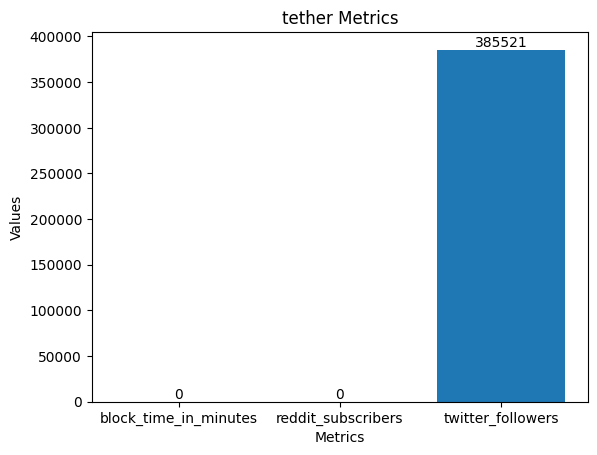

In [23]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_tether1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_tether1['reddit_subscribers'][0],
    'twitter_followers': coin_id_tether1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('tether Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [24]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_tether1.to_excel("..\Data\Datos_Procesados/tether\coin_id_tether1.xlsx", sheet_name="coin_id_tether1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [25]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/tether\coin_id_tether.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_tether2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_tether2)

       id symbol    name asset_platform_id  \
0  tether   usdt  Tether          ethereum   

                           platforms_ethereum  \
0  0xdac17f958d2ee523a2206206994597c13d831ec7   

                              platforms_oasys  \
0  0xdc3af65ecbd339309ec55f109cb214e0325c5ed4   

                             platforms_rollux  \
0  0x28c9c7fb3fe3104d2116af26cc8ef7905547349c   

                               platforms_solana  \
0  Es9vMFrzaCERmJfrF4H2FYD4KCoNkY11McCe8BenwNYB   

                        platforms_thundercore  \
0  0x4f3c8e20942461e2c3bdd8311ac57b0c222f2b82   

                             platforms_mantle  ...  \
0  0x201eba5cc46d216ce6dc03f6a759e8e766e956ae  ...   

  developer_data_pull_requests_merged  \
0                                   0   

  developer_data_pull_request_contributors  \
0                                        0   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                               None        

In [26]:
coin_id_tether2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 189 entries, id to last_updated
dtypes: float64(4), int64(62), object(123)
memory usage: 1.6+ KB


Valores faltantes

In [27]:
missing_values = coin_id_tether2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     0
platforms_ethereum                                    0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 189, dtype: int64


Exportar dataframe a archivo .xlsx

In [28]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_tether2.to_excel("..\Data\Datos_Procesados/tether\coin_id_tether2.xlsx", sheet_name="coin_id_tether2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [29]:
with open('..\Data\Fuente_json/tether\coin_id_market_chart_tether.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_tether= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_tether)


                     prices                         market_caps  \
0     [1424822400000, 1.21]             [1424822400000, 304476]   
1     [1425254400000, 0.57]             [1425254400000, 144046]   
2        [1425600000000, 1]             [1425600000000, 251600]   
3        [1425686400000, 1]             [1425686400000, 251600]   
4        [1425772800000, 1]             [1425772800000, 251600]   
...                     ...                                 ...   
3066     [1691712000000, 1]  [1691712000000, 83445632345.53148]   
3067     [1691798400000, 1]  [1691798400000, 83313809612.89717]   
3068     [1691884800000, 1]  [1691884800000, 83355420569.70955]   
3069     [1691971200000, 1]  [1691971200000, 83303287526.81169]   
3070     [1691993702000, 1]   [1691993702000, 83337411495.7147]   

                            total_volumes  
0                      [1424822400000, 5]  
1                      [1425254400000, 2]  
2                     [1425600000000, 50]  
3                  

tratamiento de columnas como listas

In [30]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_tether['timestamp'] = coin_id_market_chart_tether['prices'].apply(lambda x: x[0])
coin_id_market_chart_tether['price'] = coin_id_market_chart_tether['prices'].apply(lambda x: x[1])
coin_id_market_chart_tether['market_cap'] = coin_id_market_chart_tether['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_tether['volume'] = coin_id_market_chart_tether['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_tether['timestamp'] = pd.to_datetime(coin_id_market_chart_tether['timestamp'], unit='ms')
coin_id_market_chart_tether['price'] = pd.to_numeric(coin_id_market_chart_tether['price'])
coin_id_market_chart_tether['market_cap'] = pd.to_numeric(coin_id_market_chart_tether['market_cap'])
coin_id_market_chart_tether['volume'] = pd.to_numeric(coin_id_market_chart_tether['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_tether.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_tether)

               timestamp  price    market_cap        volume
0    2015-02-25 00:00:00   1.21  3.044760e+05  5.000000e+00
1    2015-03-02 00:00:00   0.57  1.440460e+05  2.000000e+00
2    2015-03-06 00:00:00   1.00  2.516000e+05  5.000000e+01
3    2015-03-07 00:00:00   1.00  2.516000e+05  5.819600e+04
4    2015-03-08 00:00:00   1.00  2.516000e+05  3.100000e+01
...                  ...    ...           ...           ...
3066 2023-08-11 00:00:00   1.00  8.344563e+10  1.089010e+10
3067 2023-08-12 00:00:00   1.00  8.331381e+10  8.184751e+09
3068 2023-08-13 00:00:00   1.00  8.335542e+10  9.189020e+09
3069 2023-08-14 00:00:00   1.00  8.330329e+10  9.254138e+09
3070 2023-08-14 06:15:02   1.00  8.333741e+10  1.521940e+10

[3071 rows x 4 columns]


transformacion de datos

In [31]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_tether['timestamp'] = pd.to_datetime(coin_id_market_chart_tether['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_tether['timestamp'] = coin_id_market_chart_tether['timestamp'].dt.date

In [32]:
coin_id_market_chart_tether

,timestamp,price,market_cap,volume
0,2015-02-25,1.21,3.044760e+05,5.000000e+00
1,2015-03-02,0.57,1.440460e+05,2.000000e+00
2,2015-03-06,1.00,2.516000e+05,5.000000e+01
3,2015-03-07,1.00,2.516000e+05,5.819600e+04
4,2015-03-08,1.00,2.516000e+05,3.100000e+01
...,...,...,...,...
3066,2023-08-11,1.00,8.344563e+10,1.089010e+10
3067,2023-08-12,1.00,8.331381e+10,8.184751e+09
3068,2023-08-13,1.00,8.335542e+10,9.189020e+09
3069,2023-08-14,1.00,8.330329e+10,9.254138e+09


In [33]:
# cambiar nombre columna
coin_id_market_chart_tether.rename(columns={'timestamp': 'date'}, inplace=True)

In [34]:
print(coin_id_market_chart_tether)

            date  price    market_cap        volume
0     2015-02-25   1.21  3.044760e+05  5.000000e+00
1     2015-03-02   0.57  1.440460e+05  2.000000e+00
2     2015-03-06   1.00  2.516000e+05  5.000000e+01
3     2015-03-07   1.00  2.516000e+05  5.819600e+04
4     2015-03-08   1.00  2.516000e+05  3.100000e+01
...          ...    ...           ...           ...
3066  2023-08-11   1.00  8.344563e+10  1.089010e+10
3067  2023-08-12   1.00  8.331381e+10  8.184751e+09
3068  2023-08-13   1.00  8.335542e+10  9.189020e+09
3069  2023-08-14   1.00  8.330329e+10  9.254138e+09
3070  2023-08-14   1.00  8.333741e+10  1.521940e+10

[3071 rows x 4 columns]


In [35]:
coin_id_market_chart_tether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3071 non-null   object 
 1   price       3071 non-null   float64
 2   market_cap  3071 non-null   float64
 3   volume      3071 non-null   float64
dtypes: float64(3), object(1)
memory usage: 96.1+ KB


## Grafico
para evidenciar outliers

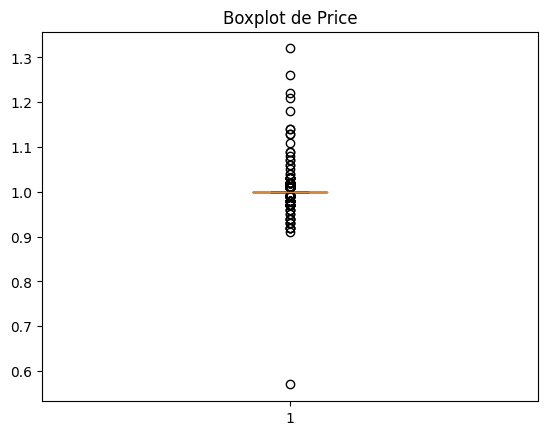

In [36]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_tether['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

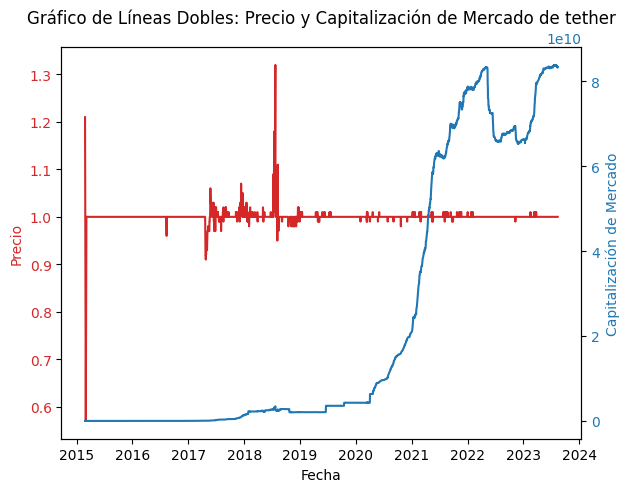

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_tether['date'] = pd.to_datetime(coin_id_market_chart_tether['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_tether['date'], coin_id_market_chart_tether['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_tether['date'], coin_id_market_chart_tether['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de tether')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_5752\518889794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


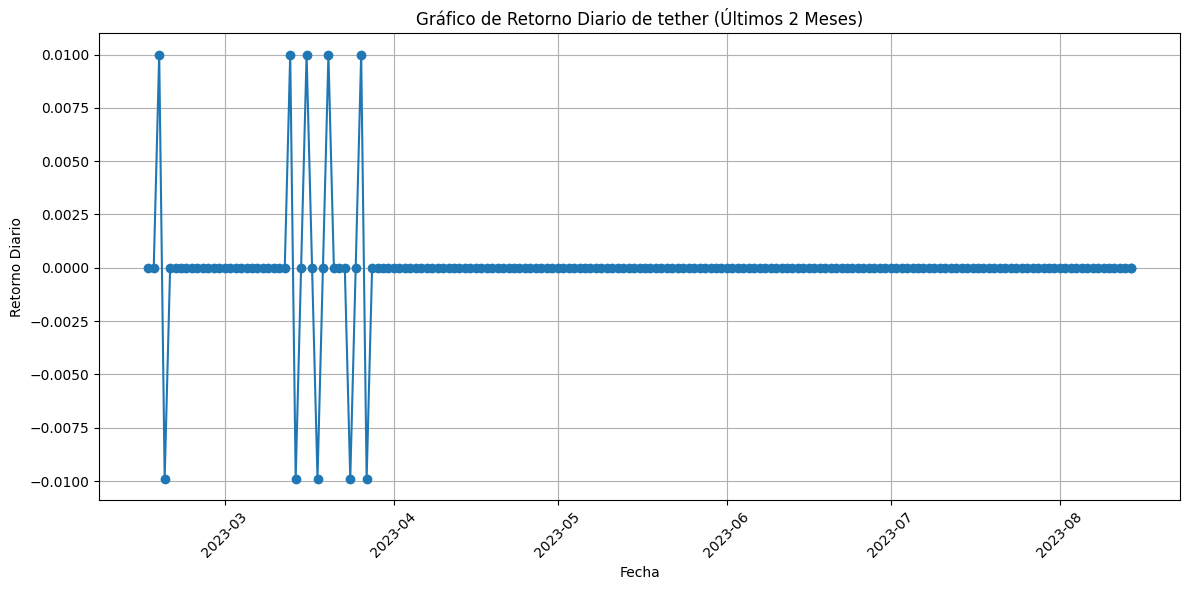

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_tether['date'] = pd.to_datetime(coin_id_market_chart_tether['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=6)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_tether[
    (coin_id_market_chart_tether['date'] >= six_months_ago) &
    (coin_id_market_chart_tether['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de tether (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

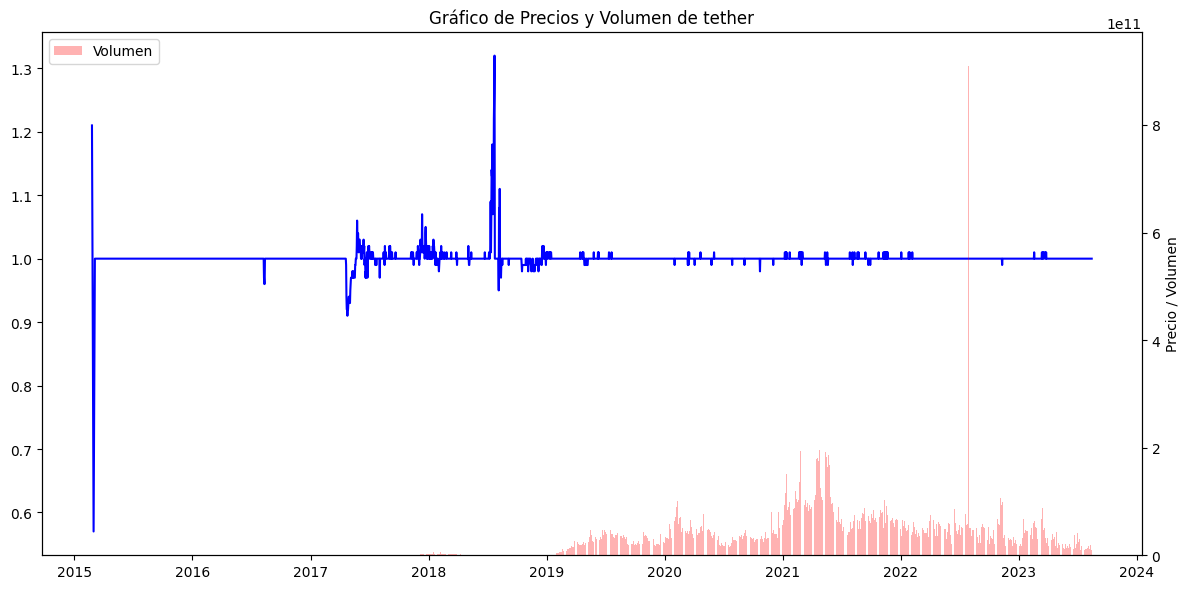

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_tether['date'] = pd.to_datetime(coin_id_market_chart_tether['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_tether['date'], coin_id_market_chart_tether['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_tether['date'], coin_id_market_chart_tether['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de tether')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [40]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_tether.to_excel("..\Data\Datos_Procesados/tether\coin_id_market_chart_tether.xlsx", sheet_name="coin_id_market_chart_tether.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [41]:
with open('..\Data\Fuente_json/tether\coin_id_ohlc_tether.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_tether= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_tether)

                 0     1     2     3     4
0    1424995200000  1.21  1.21  1.21  1.21
1    1425340800000  0.57  0.57  0.57  0.57
2    1425686400000  1.00  1.00  1.00  1.00
3    1426032000000  1.00  1.00  1.00  1.00
4    1426377600000  1.00  1.00  1.00  1.00
..             ...   ...   ...   ...   ...
800  1690761600000  1.00  1.00  1.00  1.00
801  1691020800000  1.00  1.00  1.00  1.00
802  1691366400000  1.00  1.00  1.00  1.00
803  1691712000000  1.00  1.00  1.00  1.00
804  1692057600000  1.00  1.00  1.00  1.00

[805 rows x 5 columns]


In [42]:
coin_id_ohlc_tether[0] = pd.to_datetime(coin_id_ohlc_tether[0], unit='ms')

In [43]:
# cambiar nombre columna
coin_id_ohlc_tether.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [44]:
coin_id_ohlc_tether

,0,Open,High,Low,Close
0,2015-02-27,1.21,1.21,1.21,1.21
1,2015-03-03,0.57,0.57,0.57,0.57
2,2015-03-07,1.00,1.00,1.00,1.00
3,2015-03-11,1.00,1.00,1.00,1.00
4,2015-03-15,1.00,1.00,1.00,1.00
...,...,...,...,...,...
800,2023-07-31,1.00,1.00,1.00,1.00
801,2023-08-03,1.00,1.00,1.00,1.00
802,2023-08-07,1.00,1.00,1.00,1.00
803,2023-08-11,1.00,1.00,1.00,1.00


In [45]:
coin_id_ohlc_tether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       805 non-null    datetime64[ns]
 1   Open    805 non-null    float64       
 2   High    805 non-null    float64       
 3   Low     805 non-null    float64       
 4   Close   805 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 31.6 KB


In [46]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_tether.to_excel("..\Data\Datos_Procesados/tether\coin_id_ohlc_tether.xlsx", sheet_name="coin_id_ohlc_tether.xlsx", index=False, float_format="%.2f")